# Chap 15 - Ex2: apply GMM to cluster data in iris.xlsx

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)
pd.set_option('display.width', 1000)

In [3]:
iris = pd.read_excel('Data/Iris.xls')
iris

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Shapiro test of sepallength: ShapiroResult(statistic=0.9760902723490532, pvalue=0.010181161454691156)
Shapiro test of sepalwidth: ShapiroResult(statistic=0.9837916445014413, pvalue=0.07517918532015967)
Shapiro test of petallength: ShapiroResult(statistic=0.8764246351886722, pvalue=7.545419569615864e-10)
Shapiro test of petalwidth: ShapiroResult(statistic=0.9026245656897675, pvalue=1.8647596517271003e-08)



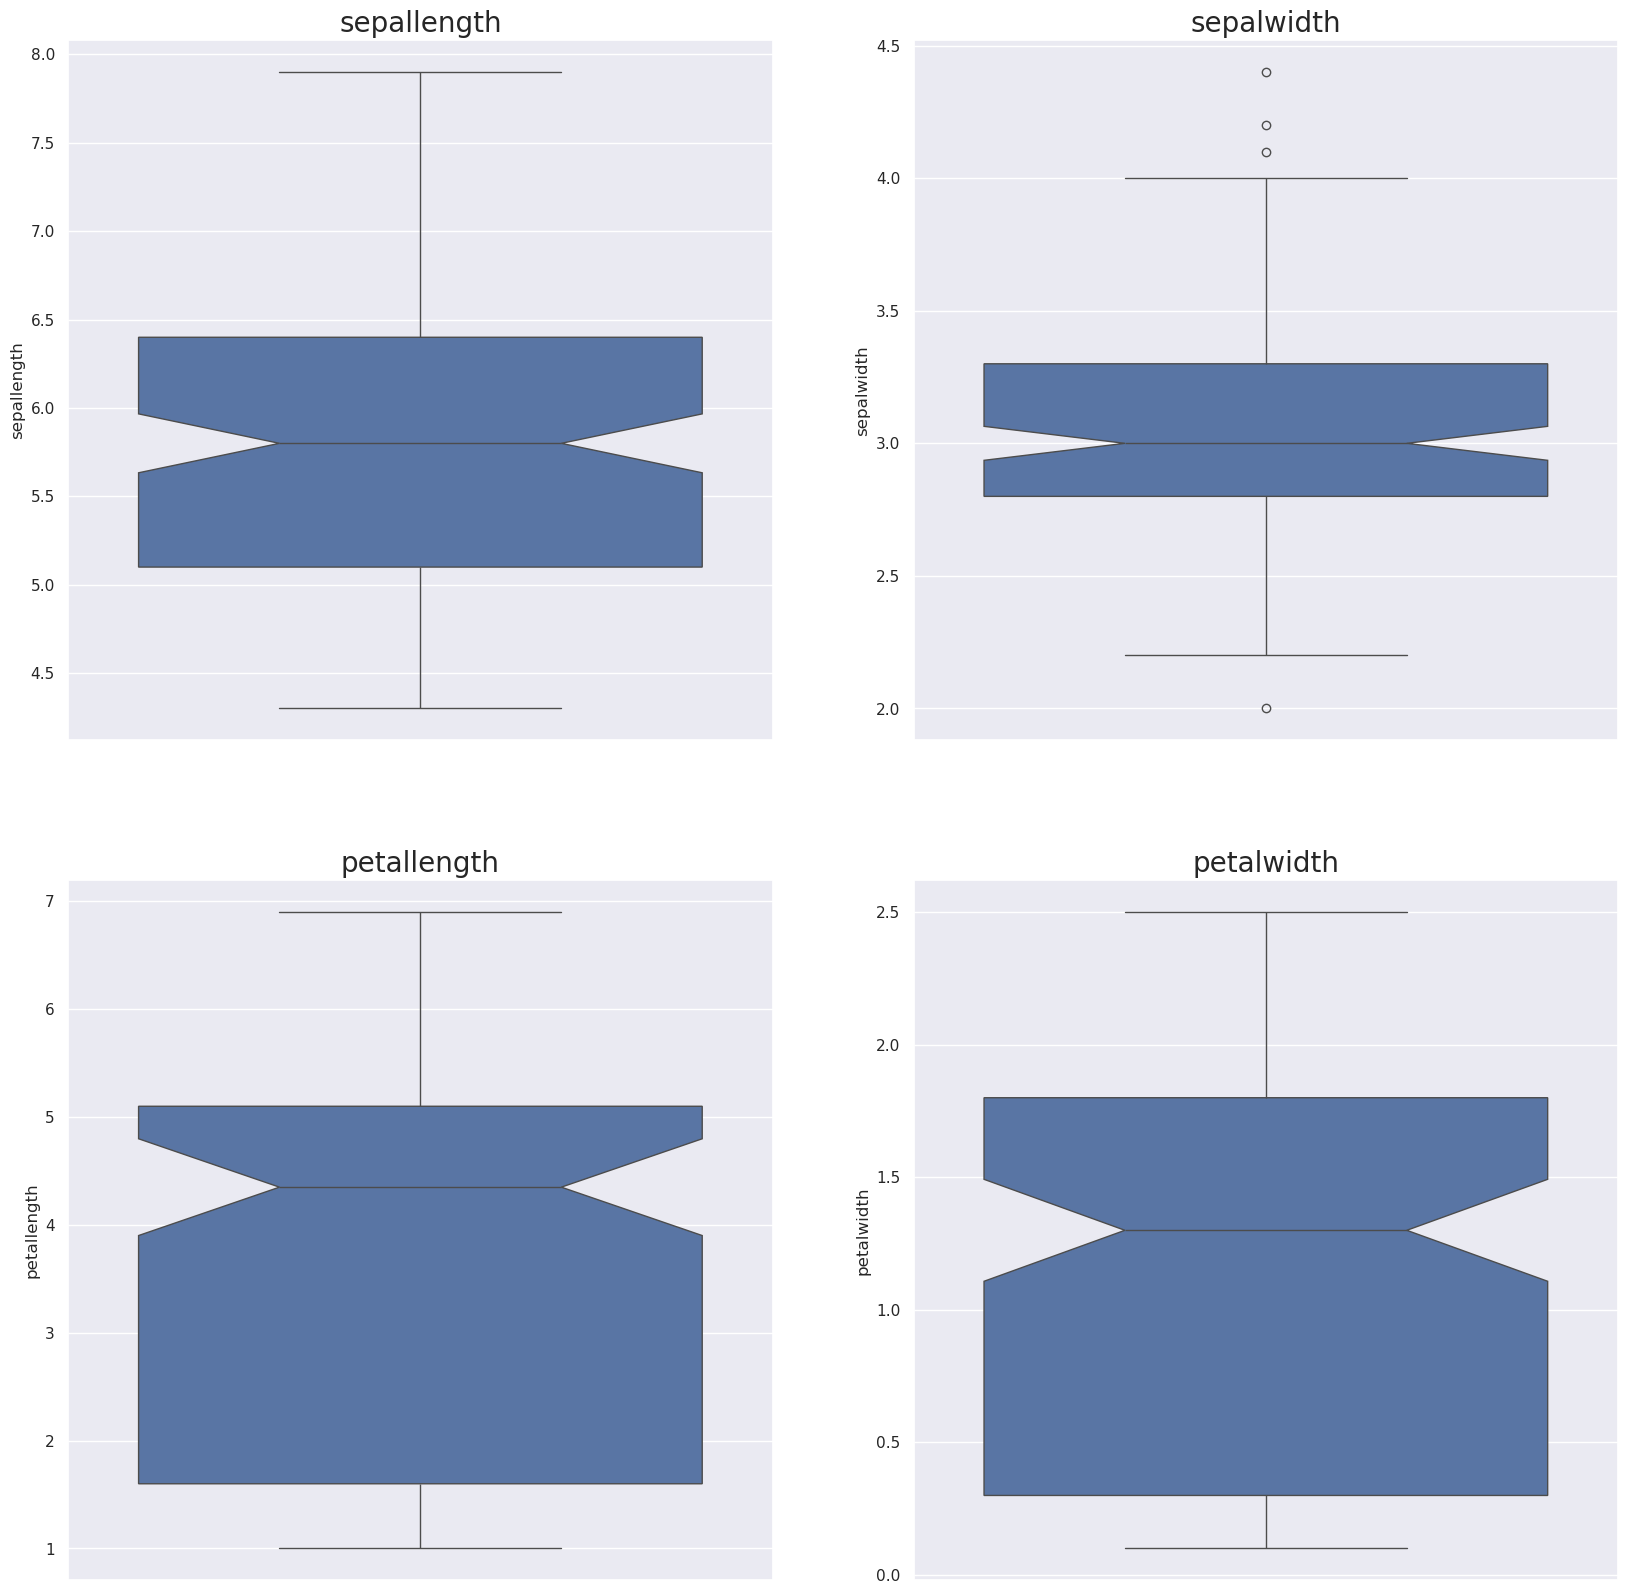

In [9]:
numeric_cols = iris.columns[:-1]

from scipy.stats import shapiro

for i in range(1, len(numeric_cols)+1):
    print(f'Shapiro test of {numeric_cols[i-1]}: {shapiro(iris[numeric_cols[i-1]])}')
print()

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for i in range(1, len(numeric_cols)+1):
    try:
        plt.subplot(2, 2, i)
        sbn.boxplot(data = iris, y = numeric_cols[i-1], notch = True)
        plt.title(numeric_cols[i-1], size = 20)
    except Exception:
        print('Error {}'.format(numeric_cols[i-1]))
        break
plt.show()

## <span style = 'color:yellow'> All variables have only a few outliers => can use MinMaxScaler
## <span style = 'color:yellow'> Use Silhoutte Score to find optimal K clusters

Silhouette score for k = 2: 0.6294675561906644
Silhouette score for k = 3: 0.45078004251628156
Silhouette score for k = 4: 0.3072844278450981
Silhouette score for k = 5: 0.22268876670292792
Silhouette score for k = 6: 0.23665915694400377
Silhouette score for k = 7: 0.21252922462034585
Silhouette score for k = 8: 0.2709547940245548
Silhouette score for k = 9: 0.24032520553415773


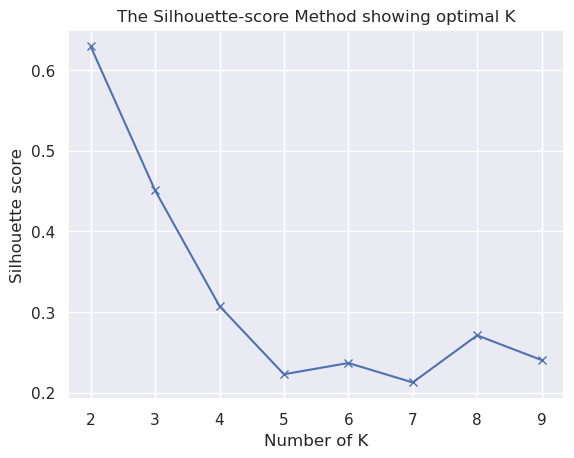

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import math

silh_score = []
k_nums = range(2,10)

data = iris.drop('iris', axis = 1)

for k in k_nums:
    gmm_pipe = Pipeline([
        ('MinMaxScaler', MinMaxScaler()),
        ('GMM', GaussianMixture(n_components = k))
    ])
    gmm_pipe.fit(data)
    data_scaled = (
        data.copy()
        .pipe(lambda df: gmm_pipe.named_steps['MinMaxScaler'].transform(df))
    )
    labels = gmm_pipe.fit_predict(data)
    print(f'Silhouette score for k = {k}: {silhouette_score(data_scaled, labels)}')
    silh_score.append(silhouette_score(data_scaled, labels))



#Plot the Silhouette Score
plt.plot(k_nums, silh_score, 'bx-')
plt.xlabel('Number of K')
plt.ylabel('Silhouette score')
plt.title('The Silhouette-score Method showing optimal K')
plt.show()

## <span style = 'color:yellow'> Build official GMM with k = 2

     sepallength  sepalwidth  petallength  petalwidth  Group
0            5.1         3.5          1.4         0.2      0
1            4.9         3.0          1.4         0.2      0
2            4.7         3.2          1.3         0.2      0
3            4.6         3.1          1.5         0.2      0
4            5.0         3.6          1.4         0.2      0
..           ...         ...          ...         ...    ...
145          6.7         3.0          5.2         2.3      1
146          6.3         2.5          5.0         1.9      1
147          6.5         3.0          5.2         2.0      1
148          6.2         3.4          5.4         2.3      1
149          5.9         3.0          5.1         1.8      1

[150 rows x 5 columns]



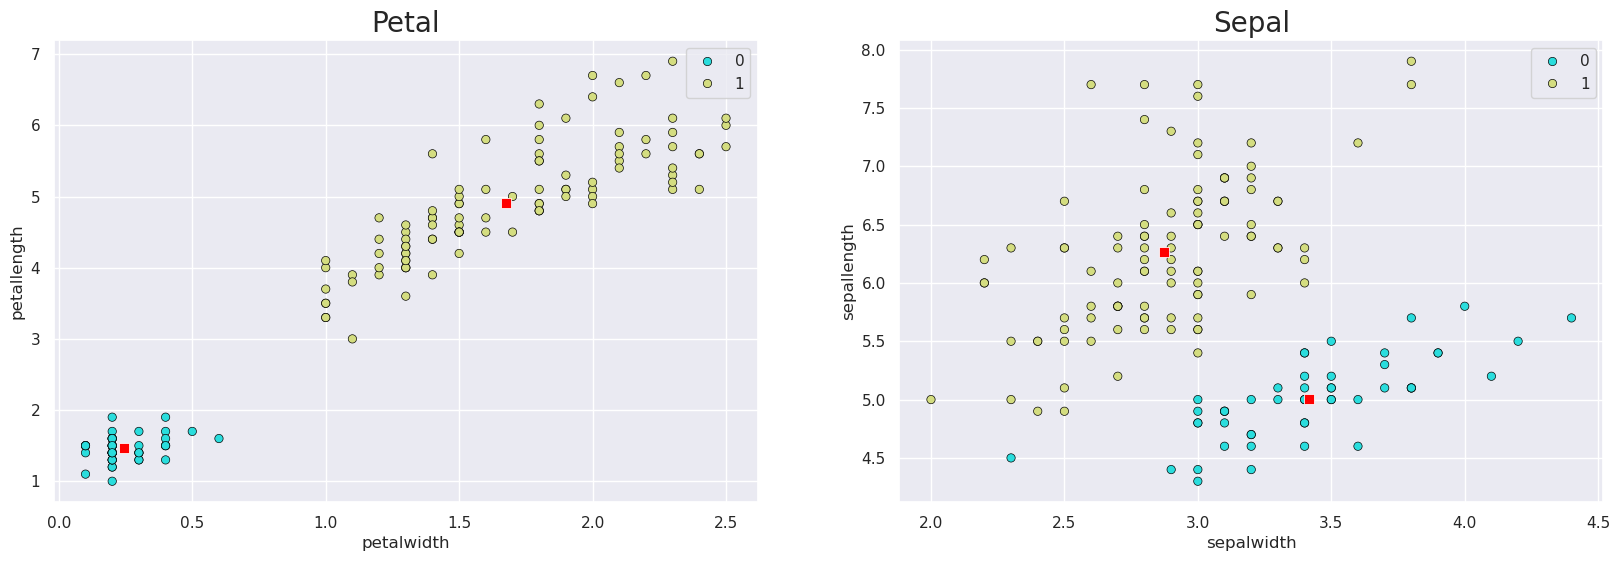

In [23]:
data = iris.drop('iris', axis = 1)

gmm_pipe = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),
    ('GMM', GaussianMixture(n_components = 2))
])
gmm_pipe.fit(data)
labels = gmm_pipe.fit_predict(data)

data_group = (
    data.copy()
    .assign(Group = labels)
)

means_inverse = gmm_pipe.named_steps['MinMaxScaler'].inverse_transform(gmm_pipe.named_steps['GMM'].means_)

print(data_group)
print()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sbn.scatterplot(data = data_group, x = 'petalwidth', y = 'petallength', hue = 'Group', palette = 'rainbow', edgecolors = 'black')
sbn.scatterplot(x = means_inverse[:,3], y = means_inverse[:,2], color = 'red', marker = 's', s = 50)
plt.title('Petal', size = 20)

plt.subplot(1,2,2)
sbn.scatterplot(data = data_group, x = 'sepalwidth', y = 'sepallength', hue = 'Group', palette = 'rainbow', edgecolors = 'black')
sbn.scatterplot(x = means_inverse[:,1], y = means_inverse[:,0], color = 'red', marker = 's', s = 50)
plt.title('Sepal', size = 20)

plt.show()